In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
print(" Loading COVID-19 Dataset...")
# Option 1: If you have the file uploaded to Colab
# df = pd.read_csv('owid-covid-data.csv')

# Option 2: Load directly from Our World in Data (recommended)
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url)

print(f"Dataset loaded successfully!")
print(f" Shape: {df.shape}")
print(f" Date range: {df['date'].min()} to {df['date'].max()}")
print(f" Countries: {df['location'].nunique()}")

 Loading COVID-19 Dataset...
Dataset loaded successfully!
 Shape: (429435, 67)
 Date range: 2020-01-01 to 2024-08-14
 Countries: 255


In [4]:
print(" DATASET OVERVIEW")
print("=" * 50)
print("\n📋 Basic Info:")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n Key Columns:")
key_cols = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
           'new_deaths', 'total_vaccinations', 'people_vaccinated', 'population']
for col in key_cols:
    if col in df.columns:
        missing = df[col].isnull().sum()
        print(f"  {col}: {missing:,} missing values ({missing/len(df)*100:.1f}%)")

# Convert date column
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['location', 'date']).reset_index(drop=True)

print("\n Data cleaned and sorted by location and date")

# Display sample data
print("\n Sample Data:")
display_cols = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'population']
print(df[display_cols].head(10))

 DATASET OVERVIEW

📋 Basic Info:
Total rows: 429,435
Total columns: 67
Memory usage: 301.12 MB

 Key Columns:
  location: 0 missing values (0.0%)
  date: 0 missing values (0.0%)
  total_cases: 17,631 missing values (4.1%)
  new_cases: 19,276 missing values (4.5%)
  total_deaths: 17,631 missing values (4.1%)
  new_deaths: 18,827 missing values (4.4%)
  total_vaccinations: 344,018 missing values (80.1%)
  people_vaccinated: 348,303 missing values (81.1%)
  population: 0 missing values (0.0%)

 Data cleaned and sorted by location and date

 Sample Data:
      location       date  total_cases  new_cases  total_deaths  population
0  Afghanistan 2020-01-05          0.0        0.0           0.0    41128772
1  Afghanistan 2020-01-06          0.0        0.0           0.0    41128772
2  Afghanistan 2020-01-07          0.0        0.0           0.0    41128772
3  Afghanistan 2020-01-08          0.0        0.0           0.0    41128772
4  Afghanistan 2020-01-09          0.0        0.0           0.0

In [5]:
print(" GLOBAL COVID-19 OVERVIEW")
print("=" * 50)

# Get latest global data (excluding continents and income groups)
exclude_locations = ['World', 'Europe', 'Asia', 'North America', 'South America',
                    'Africa', 'Oceania', 'High income', 'Upper middle income',
                    'Lower middle income', 'Low income', 'European Union']

latest_data = df[~df['location'].isin(exclude_locations)].groupby('location').last().reset_index()

# Global statistics
world_data = df[df['location'] == 'World'].iloc[-1]
print(f"Global Total Cases: {world_data['total_cases']:,.0f}")
print(f" Global Total Deaths: {world_data['total_deaths']:,.0f}")
print(f" Global Total Vaccinations: {world_data['total_vaccinations']:,.0f}")
print(f" Case Fatality Rate: {(world_data['total_deaths']/world_data['total_cases']*100):.2f}%")

# Top 10 countries by total cases
top_cases = latest_data.nlargest(10, 'total_cases')[['location', 'total_cases', 'total_deaths', 'population']]
top_cases['cases_per_million'] = (top_cases['total_cases'] / top_cases['population'] * 1000000).round(0)
top_cases['death_rate'] = (top_cases['total_deaths'] / top_cases['total_cases'] * 100).round(2)

print("\n TOP 10 COUNTRIES BY TOTAL CASES:")
print(top_cases[['location', 'total_cases', 'death_rate', 'cases_per_million']].to_string(index=False))

 GLOBAL COVID-19 OVERVIEW
Global Total Cases: nan
 Global Total Deaths: nan
 Global Total Vaccinations: 13,578,774,356
 Case Fatality Rate: nan%

 TOP 10 COUNTRIES BY TOTAL CASES:
                     location  total_cases  death_rate  cases_per_million
        High-income countries  429044049.0        0.70           343094.0
Upper-middle-income countries  251753518.0        1.12            99668.0
          European Union (27)  185822587.0        0.68           412804.0
                United States  103436829.0        1.15           305764.0
                        China   99373219.0        0.12            69692.0
Lower-middle-income countries   91954400.0        1.29            26792.0
                        India   45041748.0        1.18            31783.0
                       France   38997490.0        0.43           575074.0
                      Germany   38437756.0        0.46           461051.0
                       Brazil   37511921.0        1.87           174220.0


CREATING TIME SERIES VISUALIZATIONS


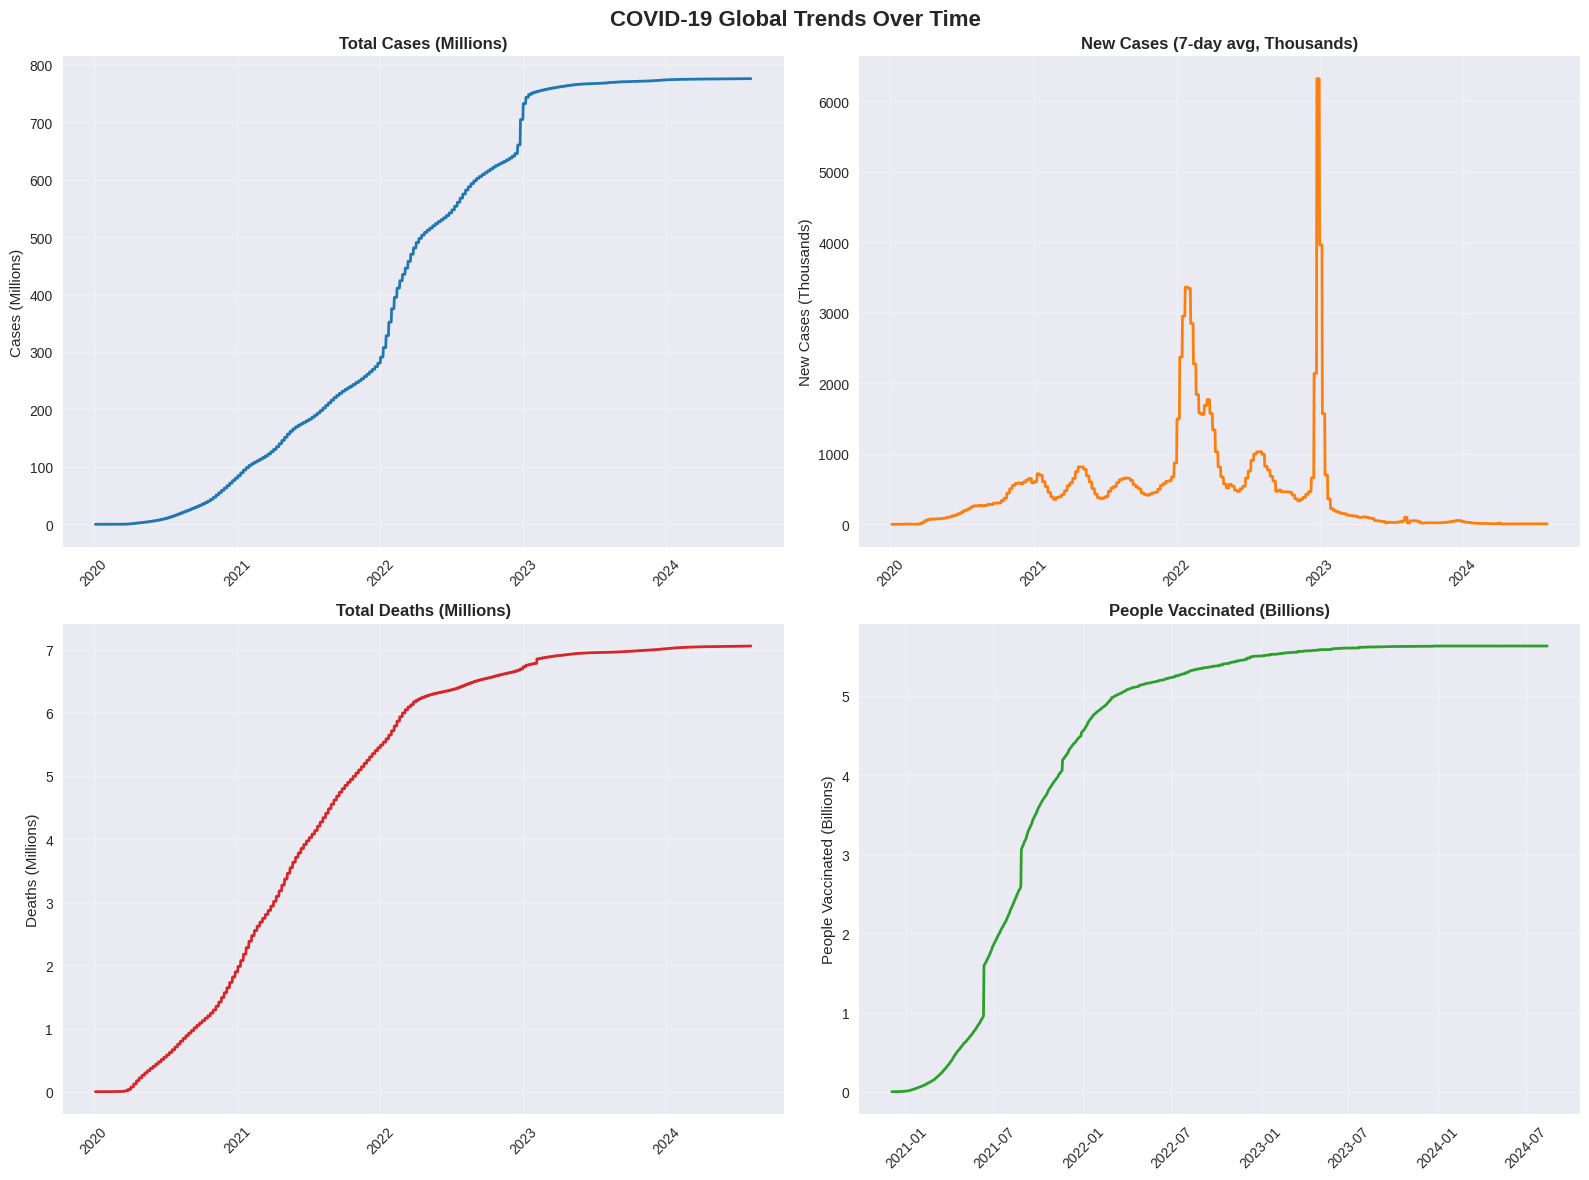

 Time series plots created successfully!


In [6]:
print("CREATING TIME SERIES VISUALIZATIONS")
print("=" * 50)

# Get world data for time series
world_ts = df[df['location'] == 'World'].copy()
world_ts = world_ts[world_ts['date'] >= '2020-01-01']

# Create subplot figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('COVID-19 Global Trends Over Time', fontsize=16, fontweight='bold')

# 1. Total Cases Over Time
axes[0,0].plot(world_ts['date'], world_ts['total_cases']/1e6, linewidth=2, color='#1f77b4')
axes[0,0].set_title('Total Cases (Millions)', fontweight='bold')
axes[0,0].set_ylabel('Cases (Millions)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# 2. New Cases (7-day average)
world_ts['new_cases_smoothed'] = world_ts['new_cases_smoothed'].fillna(world_ts['new_cases'])
axes[0,1].plot(world_ts['date'], world_ts['new_cases_smoothed']/1000, linewidth=2, color='#ff7f0e')
axes[0,1].set_title('New Cases (7-day avg, Thousands)', fontweight='bold')
axes[0,1].set_ylabel('New Cases (Thousands)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Total Deaths
axes[1,0].plot(world_ts['date'], world_ts['total_deaths']/1e6, linewidth=2, color='#d62728')
axes[1,0].set_title('Total Deaths (Millions)', fontweight='bold')
axes[1,0].set_ylabel('Deaths (Millions)')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Vaccination Progress
if 'people_vaccinated' in world_ts.columns:
    vaccination_data = world_ts[world_ts['people_vaccinated'].notna()]
    if len(vaccination_data) > 0:
        axes[1,1].plot(vaccination_data['date'], vaccination_data['people_vaccinated']/1e9,
                      linewidth=2, color='#2ca02c')
        axes[1,1].set_title('People Vaccinated (Billions)', fontweight='bold')
        axes[1,1].set_ylabel('People Vaccinated (Billions)')
        axes[1,1].grid(True, alpha=0.3)
        axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(" Time series plots created successfully!")

COUNTRY COMPARISON & GEOGRAPHIC ANALYSIS



 COUNTRY COMPARISON TABLE:
      location  total_cases  total_deaths  total_cases_per_million  total_deaths_per_million
 United States  103436829.0     1193165.0                 302859.5                    3493.6
         India   45041748.0      533623.0                  31598.9                     374.4
        France   38997490.0      168091.0                 606706.0                    2615.1
       Germany   38437756.0      174979.0                 457123.1                    2081.0
        Brazil   37511921.0      702116.0                 178367.9                    3338.5
         Italy   26781078.0      197307.0                 449202.9                    3309.5
United Kingdom   24974629.0      232112.0                 366308.0                    3404.4
        Russia   24268728.0      403188.0                 166703.8                    2769.5
        Turkey   17004718.0      101419.0                 195325.2                    1165.0
          Iran    7627863.0      146837.0 

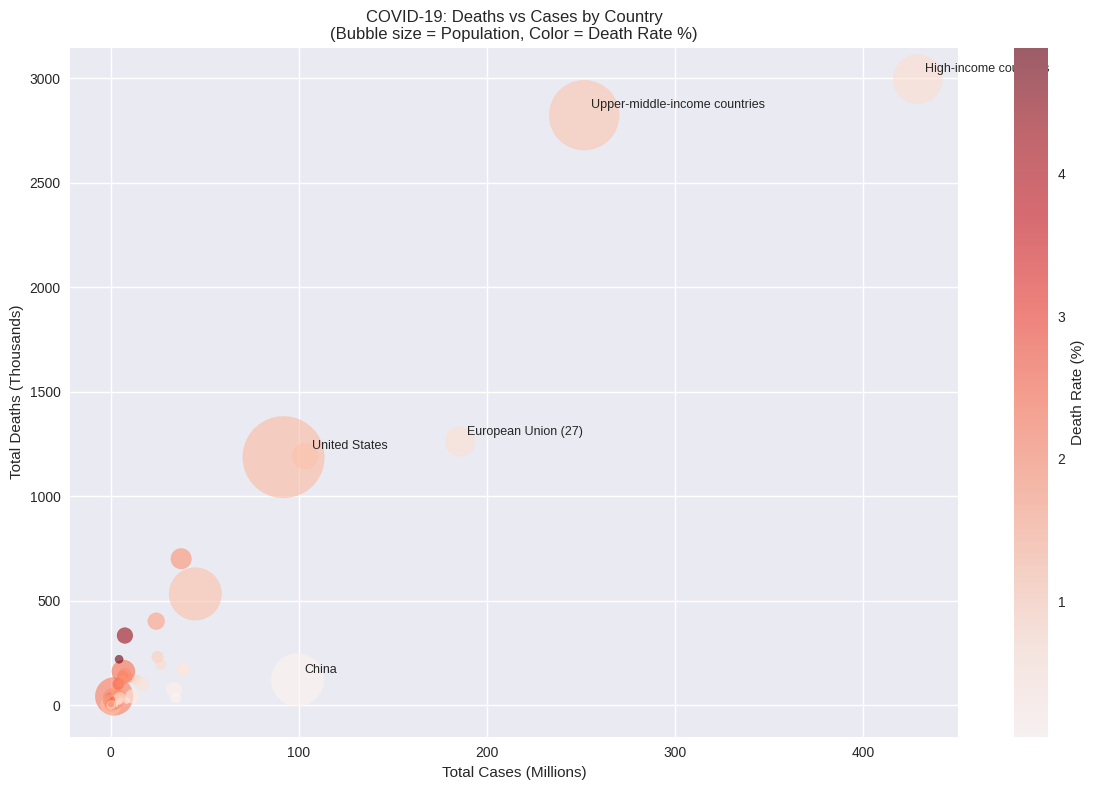

 Country comparison analysis completed!


In [8]:
print("COUNTRY COMPARISON & GEOGRAPHIC ANALYSIS")
print("=" * 50)

# Select top 10 countries for comparison
top_countries = ['United States', 'India', 'Brazil', 'France', 'Germany',
                'Iran', 'Russia', 'Turkey', 'United Kingdom', 'Italy']

# Filter data for selected countries
country_data = df[df['location'].isin(top_countries)].copy()
country_data = country_data[country_data['date'] >= '2020-03-01']

# Create interactive plot using plotly
fig = px.line(country_data,
              x='date',
              y='total_cases_per_million',
              color='location',
              title='COVID-19 Cases per Million Population - Top 10 Countries',
              labels={'total_cases_per_million': 'Cases per Million',
                     'date': 'Date',
                     'location': 'Country'})

fig.update_layout(height=600, showlegend=True)
fig.show()

# Create a comparison table
latest_comparison = latest_data[latest_data['location'].isin(top_countries)].copy()
comparison_metrics = latest_comparison[['location', 'total_cases', 'total_deaths',
                                      'total_cases_per_million', 'total_deaths_per_million']].copy()
comparison_metrics = comparison_metrics.sort_values('total_cases', ascending=False)

print("\n COUNTRY COMPARISON TABLE:")
print(comparison_metrics.round(1).to_string(index=False))

# Deaths vs Cases scatter plot
fig, ax = plt.subplots(figsize=(12, 8))
scatter_data = latest_data[latest_data['total_cases'] > 100000]  # Filter for significant data

scatter = ax.scatter(scatter_data['total_cases']/1e6,
                    scatter_data['total_deaths']/1e3,
                    s=scatter_data['population']/1e6,  # Size by population
                    alpha=0.6,
                    c=scatter_data['total_deaths']/scatter_data['total_cases']*100,
                    cmap='Reds')

ax.set_xlabel('Total Cases (Millions)')
ax.set_ylabel('Total Deaths (Thousands)')
ax.set_title('COVID-19: Deaths vs Cases by Country\n(Bubble size = Population, Color = Death Rate %)')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Death Rate (%)')

# Annotate some key countries
for idx, row in scatter_data.nlargest(5, 'total_cases').iterrows():
    ax.annotate(row['location'],
               (row['total_cases']/1e6, row['total_deaths']/1e3),
               xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

print(" Country comparison analysis completed!")




 VACCINATION ANALYSIS & KEY INSIGHTS


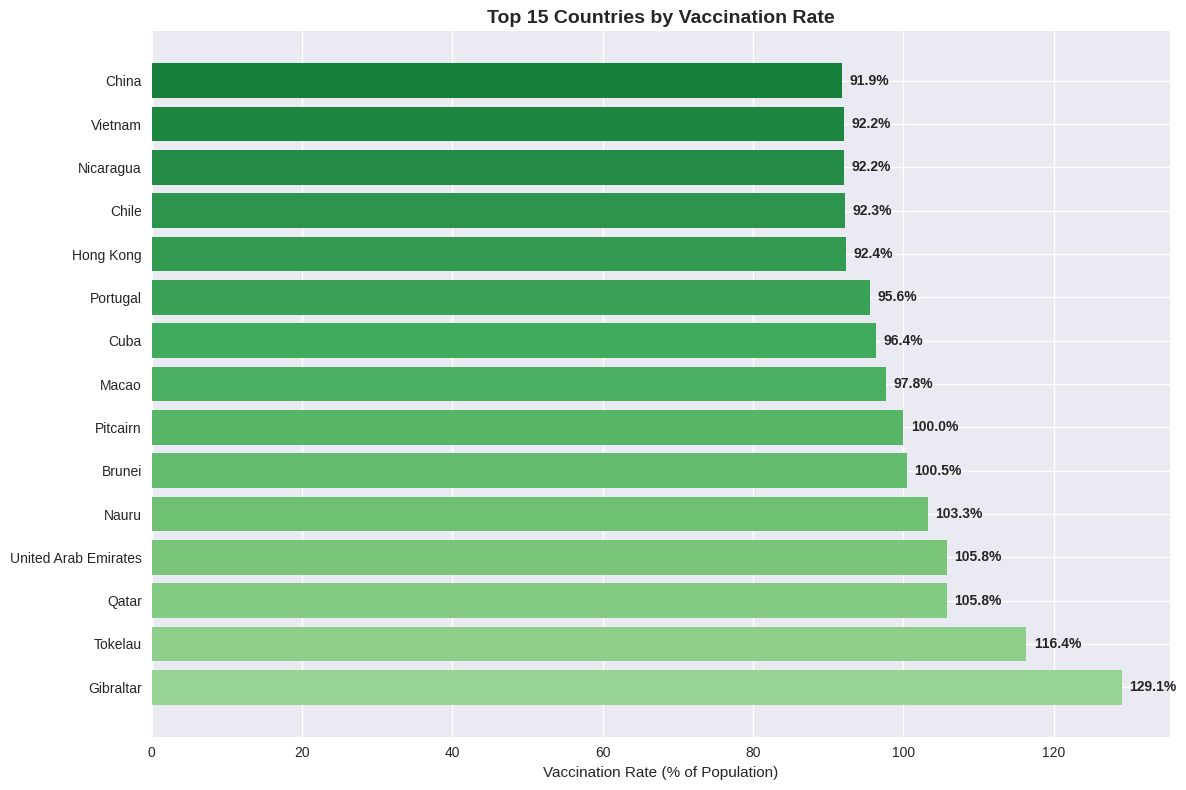

 Top vaccination rate: Gibraltar (129.1%)

KEY INSIGHTS SUMMARY
 Total Countries Affected: 248
 Global Cases: nan
 Global Deaths: nan
 Global CFR: nan%
 Data Period: January 2020 to August 2024
 Highest Cases: High-income countries (429,044,049)
 Best Vaccination: Gibraltar (129.1%)

 Analysis Complete! This notebook provides:
✓ Global COVID-19 trends over time
✓ Country-wise comparison analysis
✓ Geographic distribution patterns
✓ Vaccination progress tracking
✓ Key statistical insights

 Next Steps:
• Try filtering data for specific regions or time periods
• Explore correlation between population density and spread
• Analyze the impact of vaccination on new cases
• Create predictive models for future trends


In [9]:
print(" VACCINATION ANALYSIS & KEY INSIGHTS")
print("=" * 50)

# Vaccination analysis
vacc_data = df[(df['people_vaccinated'].notna()) &
               (~df['location'].isin(exclude_locations))].copy()

if len(vacc_data) > 0:
    # Latest vaccination data by country
    latest_vacc = vacc_data.groupby('location').last().reset_index()
    latest_vacc['vaccination_rate'] = (latest_vacc['people_vaccinated'] / latest_vacc['population'] * 100)

    # Top 15 countries by vaccination rate
    top_vacc = latest_vacc.nlargest(15, 'vaccination_rate')

    # Create vaccination rate chart
    fig, ax = plt.subplots(figsize=(12, 8))
    bars = ax.barh(range(len(top_vacc)), top_vacc['vaccination_rate'],
                   color=plt.cm.Greens(np.linspace(0.4, 0.8, len(top_vacc))))

    ax.set_yticks(range(len(top_vacc)))
    ax.set_yticklabels(top_vacc['location'])
    ax.set_xlabel('Vaccination Rate (% of Population)')
    ax.set_title('Top 15 Countries by Vaccination Rate', fontweight='bold', fontsize=14)

    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', ha='left', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f" Top vaccination rate: {top_vacc.iloc[0]['location']} ({top_vacc.iloc[0]['vaccination_rate']:.1f}%)")

# Key Insights Summary
print("\nKEY INSIGHTS SUMMARY")
print("=" * 50)

world_latest = df[df['location'] == 'World'].iloc[-1]
total_countries = len(df[~df['location'].isin(exclude_locations)]['location'].unique())

insights = [
    f" Total Countries Affected: {total_countries}",
    f" Global Cases: {world_latest['total_cases']:,.0f}",
    f" Global Deaths: {world_latest['total_deaths']:,.0f}",
    f" Global CFR: {(world_latest['total_deaths']/world_latest['total_cases']*100):.2f}%",
    f" Data Period: {df['date'].min().strftime('%B %Y')} to {df['date'].max().strftime('%B %Y')}",
    f" Highest Cases: {top_cases.iloc[0]['location']} ({top_cases.iloc[0]['total_cases']:,.0f})",
]

if len(vacc_data) > 0:
    insights.append(f" Best Vaccination: {top_vacc.iloc[0]['location']} ({top_vacc.iloc[0]['vaccination_rate']:.1f}%)")

for insight in insights:
    print(insight)

print("\n Analysis Complete! This notebook provides:")
print("✓ Global COVID-19 trends over time")
print("✓ Country-wise comparison analysis")
print("✓ Geographic distribution patterns")
print("✓ Vaccination progress tracking")
print("✓ Key statistical insights")

print("\n Next Steps:")
print("• Try filtering data for specific regions or time periods")
print("• Explore correlation between population density and spread")
print("• Analyze the impact of vaccination on new cases")
print("• Create predictive models for future trends")